## Unsupervised learning: Oja's rule

In the first part of this exercise we will reproduce the Figures in Chapter 39 of the MacKay book.

$x$ is an $p \times N$ matrix containing all the N-dimensional input vectors for each of the p patterns. We pick $N=2$ and set x[0]=-1, so that w[0] is the threshold, and w[1] and w[2] are the weights.

$t$ is a vector of length p containing the targets for each training pattern, each target $\in$ {0,1}

We can choose two options: linearly separable patterns, or nonseparable patterns

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

## Training set

2D multivariate gaussian with first principal component along the first diagonal.


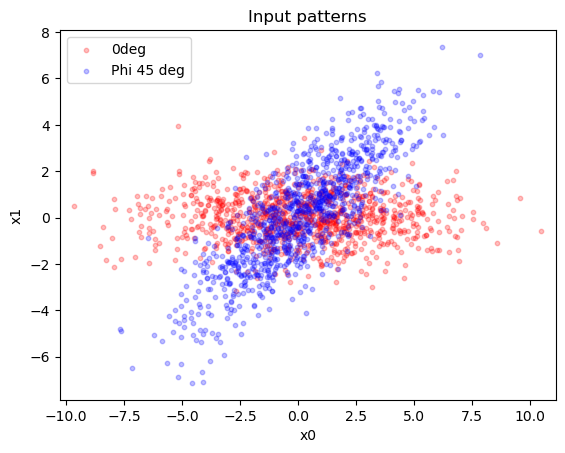

In [ ]:
def generate_data(p = 1000, mean = [0,0], cov = [[1, 0],[0,1]], angle=30, plots = True):
    #### generate data
    # p = 1000 # number of patterns
    mean0 = mean
    cov0 = cov
    x0fromcov0, x1fromcov0 = np.random.multivariate_normal(mean0, cov0, p).T # before rotation
    xinit = np.array([x0fromcov0, x1fromcov0]).T # rows = observations, columns = dimensions

    # rotation by angle
    Phi = angle * np.pi/180
    c, s = np.cos(Phi), np.sin(Phi)
    R = np.array(((c,-s), (s, c))) # rotation matrix
    x = np.dot(R, xinit.T).T # rotated datapoints
    
    if plots == True:
        size=10
        fig,ax=plt.subplots()
        ax.scatter(xinit[:,0],xinit[:,1],s=size,color='red',alpha=0.25,label='0deg')
        ax.scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25,label='Phi {:} deg'.format(angle))
        ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Input patterns');
        ax.axis('equal')
        ax.legend()
    return x

angle=45
p=1000
x=generate_data(p = p, mean = [0,0], cov = [[10, 0],[0,1]], angle=angle)

## Principal Component Analysis

PCs (cols in V)
[[ 0.71633461 -0.69775693]
 [ 0.69775693  0.71633461]]
eigenvalues
[10.17964356  1.00596567]
varianve explained (percentage)
[91.00660811  8.99339189]


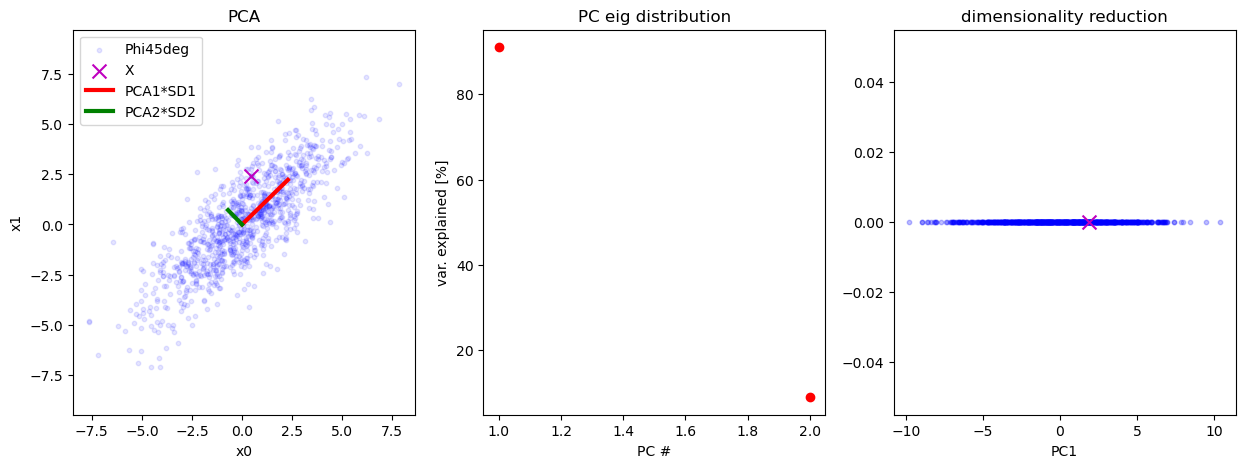

In [3]:
# covariance matrix
def cov(data):
    # calculate covariance matrix
    return np.cov(data.T)

# principal component analysis
def pca(data,pc_count=None):
    data1=data - np.mean(data, axis=0) # center the data
    C=cov(data1) # cov matrix
    E, V=np.linalg.eig(C) # eigenvectors and eigenvalues
    # sort in descending order
    order = E.argsort()[::-1]
    E, V = E[order], V[:,order]
    # project data
    score=np.dot(data1, V)
    return V,E,score
       
# perform PCA
V,E,score=pca(x)
print('PCs (cols in V)'); print(V)
print('eigenvalues'); print(E)
print('varianve explained (percentage)'); print(100*E/sum(E))

    
fig,ax=plt.subplots(1,3,figsize=(15,5))
size=10

# plot PCA eigenvectors
ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.1,label='Phi{:}deg'.format(angle))
ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('PCA');
ax[0].axis('equal')
ax[0].legend()

# distribution of eigenvalues
percE=100*E/sum(E)
indPC=np.arange(len(percE))+1
ax[1].scatter(indPC,percE,c='r')
ax[1].set_xlabel('PC #'); ax[1].set_ylabel('var. explained [%]'); ax[1].set_title('PC eig distribution');

# dimensionality reduction on PC1
ax[2].scatter(score[:,0],np.zeros((p,1)),s=10,color='blue',alpha=0.25)
ax[2].scatter(score[-1,0],0,s=100,color='m',marker='x',label='X')
ax[2].set_xlabel('PC1'); ax[2].set_ylabel(''); ax[2].set_title('dimensionality reduction');


## Activity rule 
Activity: 
$$
{\cal O}=f(h)=\sum_{i=1}^N w_i x_i
$$

## Online training using Oja's learning rule
$$
\Delta w_i=\eta {\cal O}\left(x_i^\mu-\alpha {\cal O} w_i\right)
$$

A learning rule is called online when it's updated with every data point. It's more biologically plausible.

initial weights [ 6.123234e-17 -1.000000e+00]


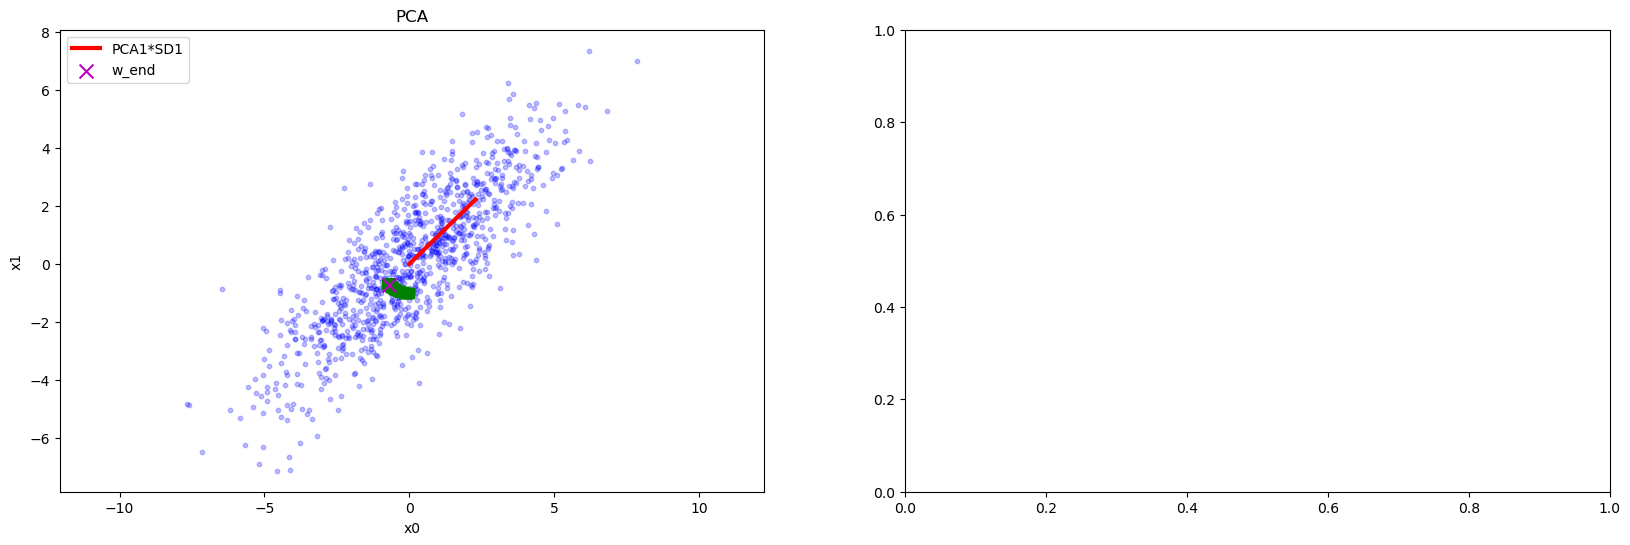

In [6]:
Tfold=1# number of repeats over the whole batch
stepPlot=10# snapshot

eta = 0.001# learning rate
alpha=1# weight decay

initial_angle=-90# initial weights
randangle=initial_angle*np.pi/180# initial angle of weight vector (deg)
w=np.array([np.cos(randangle),np.sin(randangle)])

print('initial weights %s' % w)

            
# plot training 
wplot=[]  
for ifold in range(Tfold):
    for i in range(p):
        y=np.dot(w,x[i,:])
        w=w+eta*y*(x[i,:]-alpha*y*w)
        if (i % stepPlot==0):
            wplot.append(w)
        
             
wplot=np.array(wplot)
fig,ax=plt.subplots(1,2,figsize=(20,6))
# learning steps
xplot=stepPlot*(np.arange(len(wplot)))
ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
# ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
# ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
ax[0].scatter(wplot[:,0],wplot[:,1],s=50,marker='s',c='g')
ax[0].scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x',label='w_end')



ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('PCA');
ax[0].axis('equal')
ax[0].legend()


### Assignments:

Question 1: Train the network using p=10.000 circular data points generated with covariance matrix C=[[1,0],[0,1]]. Train the network several times starting from different random initial conditions for the weights. What happens to the weights? Train the network for a longer time: what do the weights converge to? Propose an explanation for what you found.

Question 1: Train the network using p=1000 data points generated with covariance matrix C=[[10,0],[0,1]] and mean mu=[10,10]. What happens to the weights? Do the weights still represent the 1st PC, or something else? Why?

Question 3: Train the network using the unsupervised learning rule derived in the previous assignment:
$$
\Delta w_i=\eta[(Cw)_i-\alpha w_i(w^Tw)]
$$
What is the difference between the weights obtained from Oja's rule and the weights obtained from this new rule?